***Apply K-Means, Hierarchical Clustering, and DBSCAN to group flowers in the Iris dataset based on their features.***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset from sklearn

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Step 1 : Data preprocessing.

## Check the mising values.

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


* There is no missing are there.

In [ ]:
print("The shape of the dataset is:")
print(df.shape)

The shape of the dataset is:
(150, 4)


## Scale the features.

In [ ]:
from sklearn.preprocessing import StandardScaler



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
print(f"\nDataset shape: {df.shape}")
print(f"Target names: {iris.target_names}")


Dataset shape: (150, 4)
Target names: ['setosa' 'versicolor' 'virginica']


# Step 2 : EDA

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## See the pairplot to visualize relationships between features.

<Figure size 1200x800 with 0 Axes>

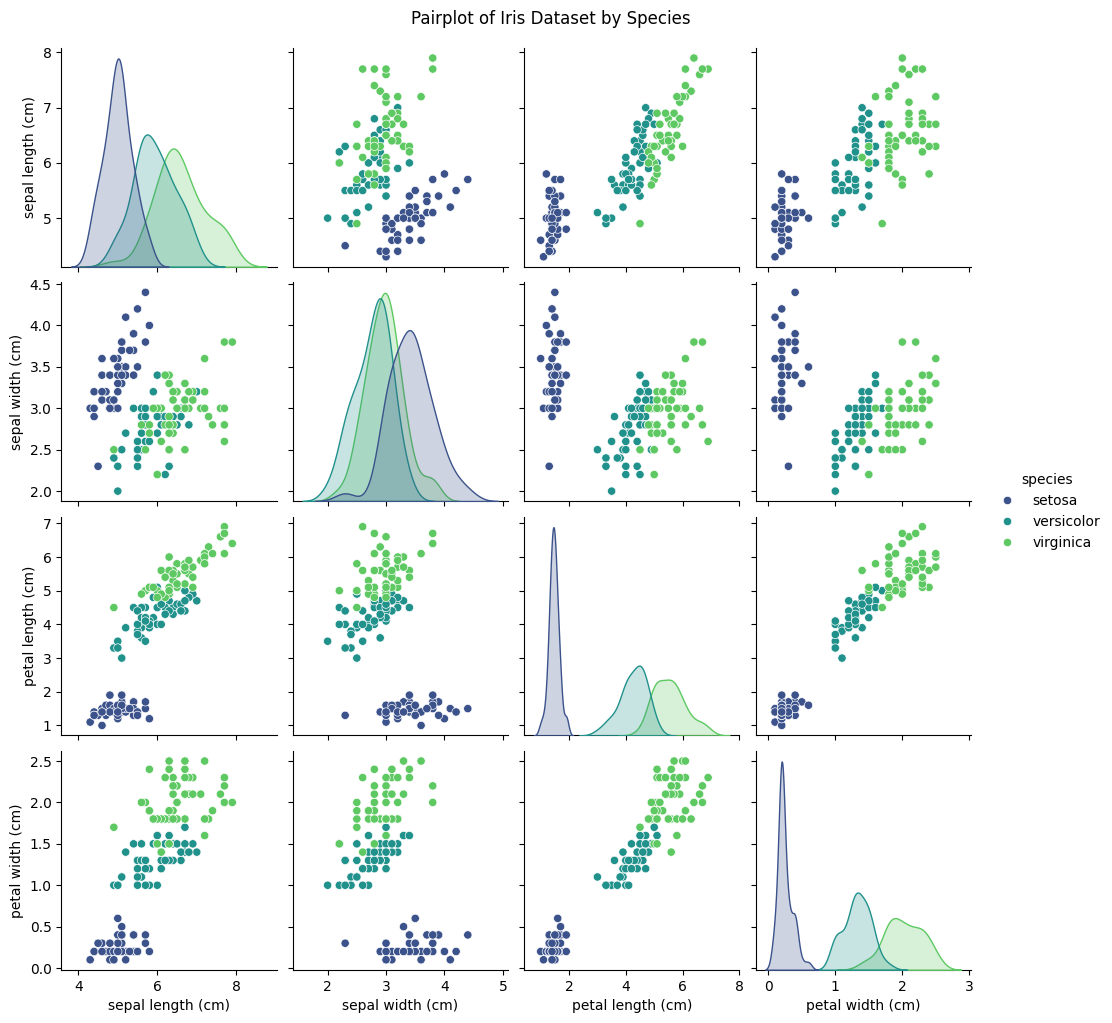

In [ ]:
# Add the 'species' column to the DataFrame if it doesn't exist
if 'species' not in df.columns:
    df['species'] = iris.target
    df['species'] = df['species'].apply(lambda x: iris.target_names[x])

plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle("Pairplot of Iris Dataset by Species", y=1.02)
plt.show()

## See the Co-relations Hitmap

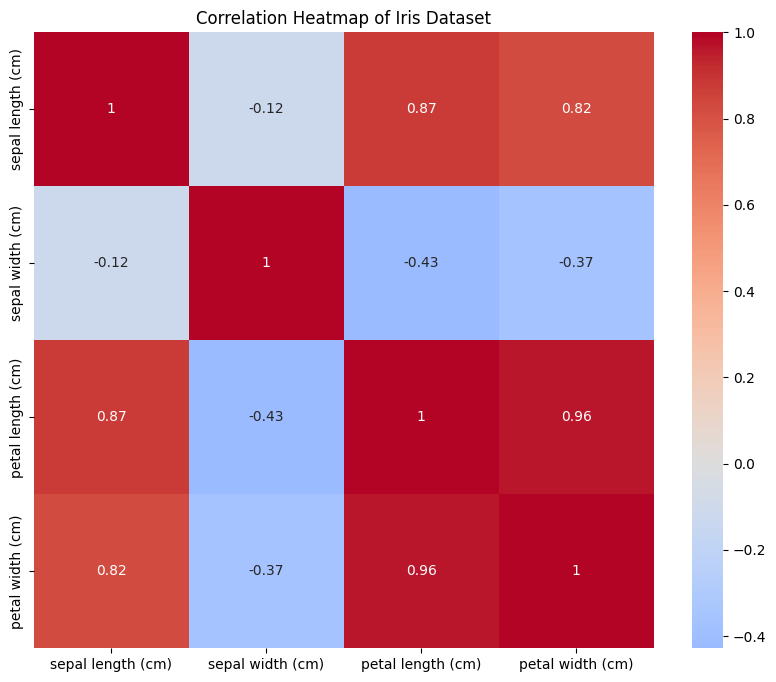

In [ ]:
plt.figure(figsize=(10, 8))
# Exclude the 'species' column before calculating the correlation
correlation = df.drop('species', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

# Step 03 : Apply Clustering Algorithms.

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Try different k values and use elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

## Plot the elbow method

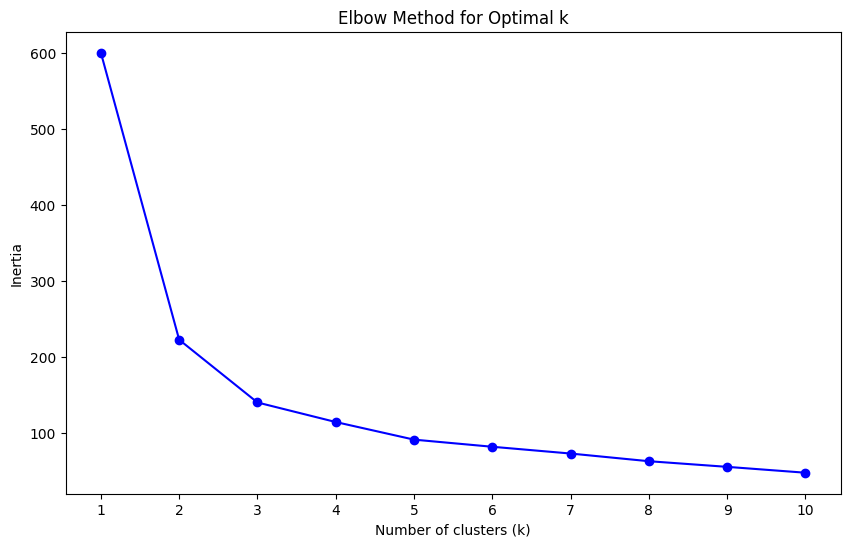

In [ ]:
# Try different k values and use elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()

##  Based on elbow method, choose k=3.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

## Let Visualize clusters using PCA.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

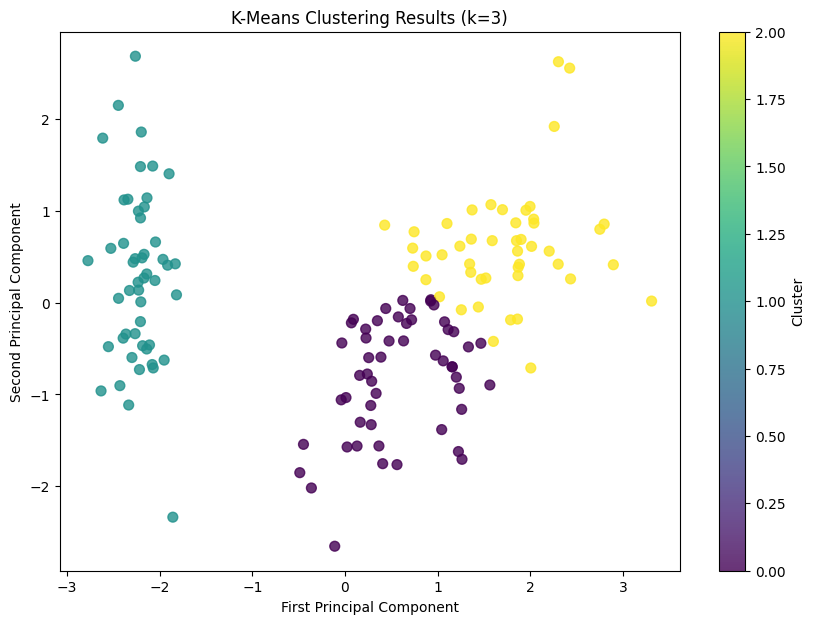

In [ ]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results (k=3)')
plt.colorbar(scatter, label='Cluster')
plt.show()

##  Hierarchical Clustering

###  Plot dendrogram to choose number of clusters


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram


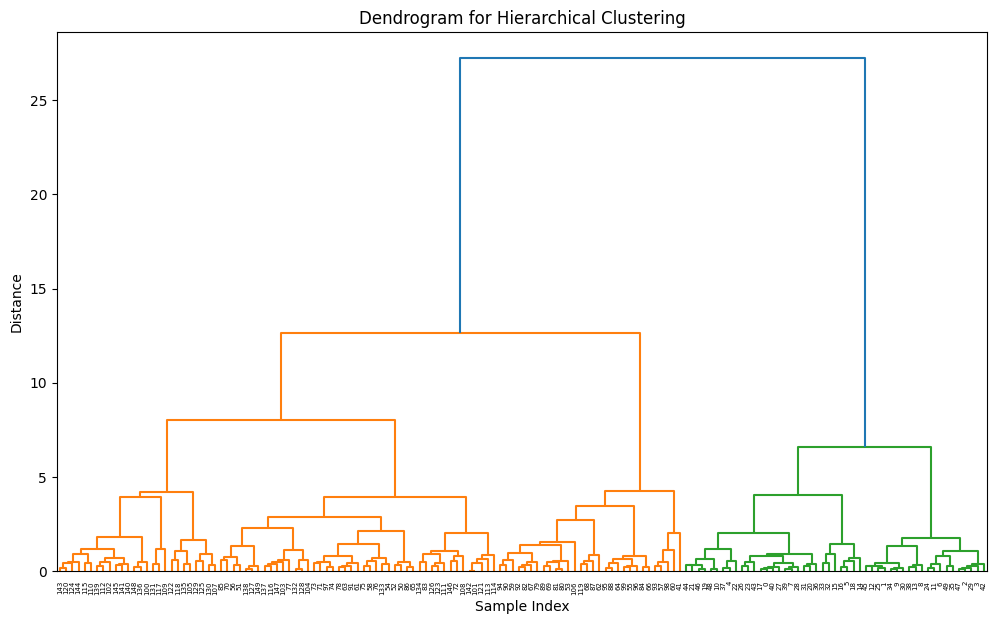

In [ ]:

plt.figure(figsize=(12, 7))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Based on dendrogram, choose 3 clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

##  Visualize hierarchical clustering results

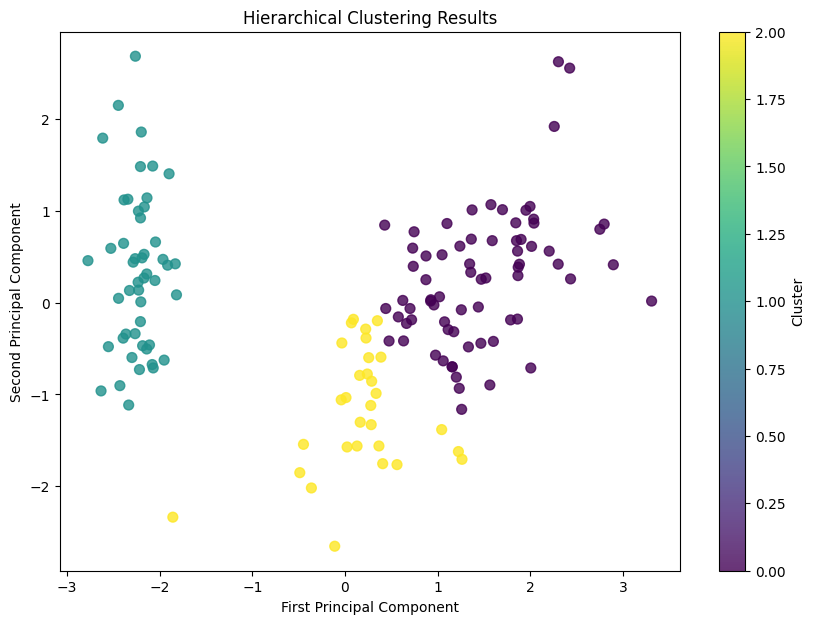

In [ ]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Hierarchical Clustering Results')
plt.colorbar(scatter, label='Cluster')
plt.show()

## DBSCAN Clustering

In [ ]:
## Use k-distance graph to find eps

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

## Plot k-distance graph

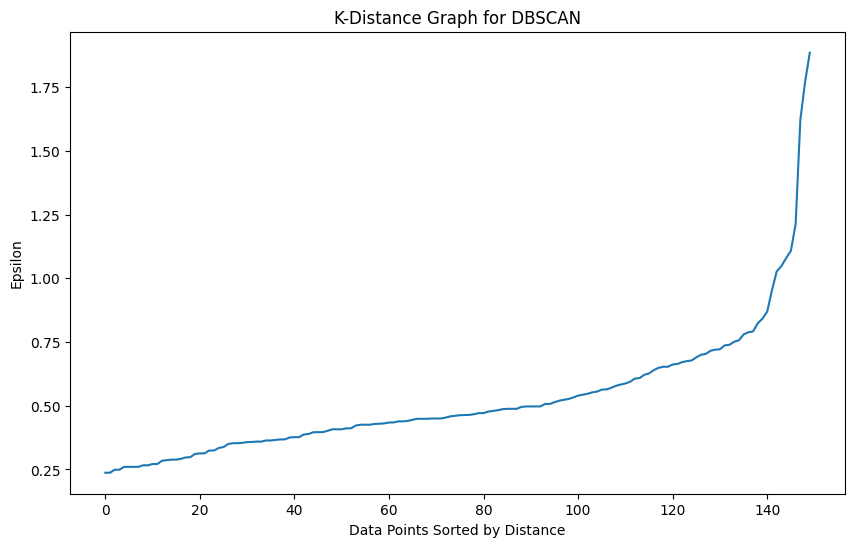

In [ ]:
# Sort distances
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Epsilon')
plt.title('K-Distance Graph for DBSCAN')
plt.show()

 ## Based on the graph, choose eps=0.5

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


## Count clusters and noise points

In [ ]:
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")


DBSCAN found 2 clusters and 34 noise points.


## Visualize DBSCAN results

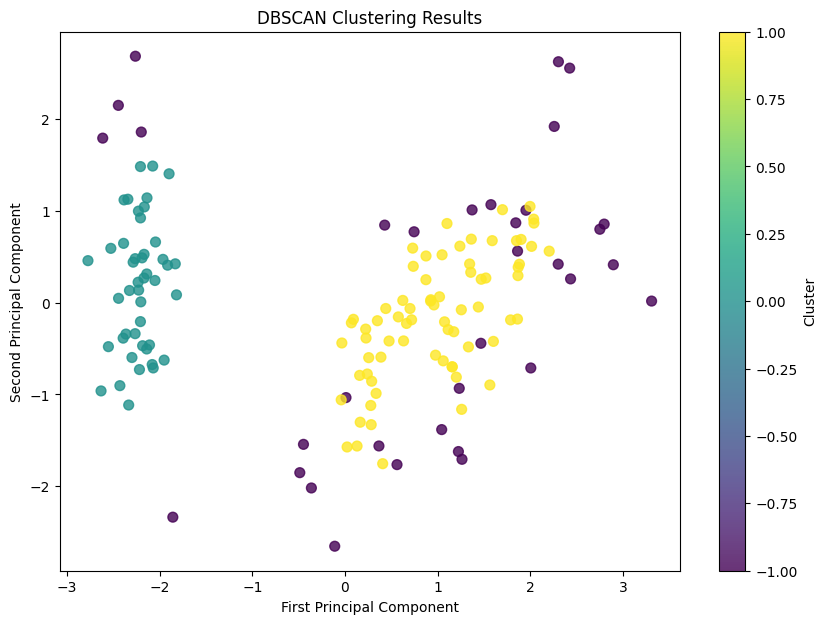

In [ ]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('DBSCAN Clustering Results')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Step 4 : Evaluation

## Compare cluster labels to actual species

In [48]:
from sklearn.metrics import adjusted_rand_score

In [55]:
print("Adjusted Rand Scores :")
print(f"K-Means: {adjusted_rand_score(iris.target, kmeans_labels):.4f}")
print(f"Hierarchical: {adjusted_rand_score(iris.target, hierarchical_labels):.4f}")
print(f"DBSCAN: {adjusted_rand_score(iris.target, dbscan_labels):.4f}")

Adjusted Rand Scores :
K-Means: 0.6201
Hierarchical: 0.6153
DBSCAN: 0.4421


K-Means performed the best

K-Means with k=3 provided the best alignment with the actual species

Hierarchical clustering also performed well but with slightly lower accuracy

DBSCAN identified 2 clusters and some noise points, which didn't align as well with the three species



##  Confusion matrix for K-Means

In [49]:
from sklearn.metrics import confusion_matrix

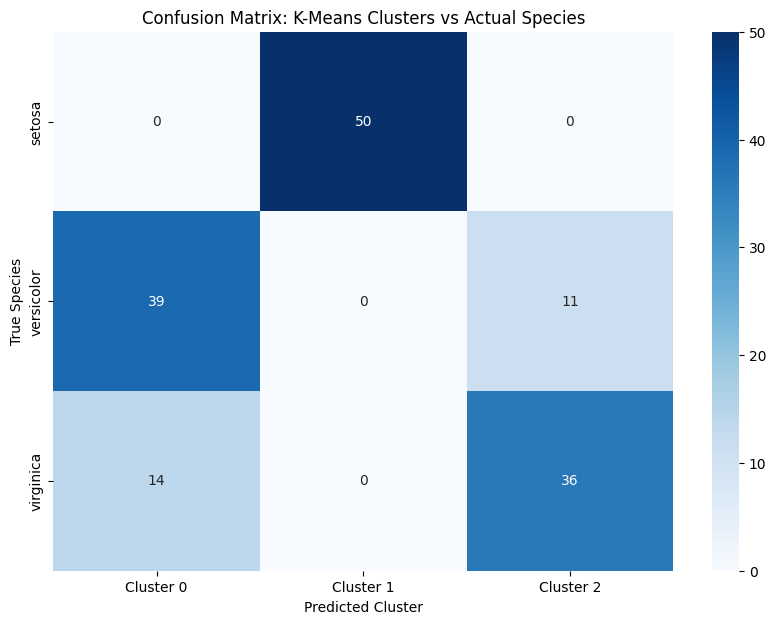

In [51]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(iris.target, kmeans_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(3)],
            yticklabels=iris.target_names)
plt.title('Confusion Matrix: K-Means Clusters vs Actual Species')
plt.ylabel('True Species')
plt.xlabel('Predicted Cluster')
plt.show()

## Map clusters to species based on majority vote

In [54]:
cluster_to_species = {}
for cluster in range(3):
    # Find the most common species in this cluster
    species_in_cluster = iris.target[kmeans_labels == cluster]
    species = np.bincount(species_in_cluster).argmax()
    cluster_to_species[cluster] = iris.target_names[species]

print("\nK-Means Cluster to Species Mapping:")
for cluster, species in cluster_to_species.items():
    print(f"Cluster {cluster} : {species}")


K-Means Cluster to Species Mapping:
Cluster 0 : versicolor
Cluster 1 : setosa
Cluster 2 : virginica
